In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Fungsi untuk membangun model VGG16
def build_vgg16(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Tambahkan Input layer
    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Path ke data training dan testing
train_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Training'
val_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Validasi'
test_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Testing'


In [ ]:
# Image data generator tanpa augmentasi, hanya rescale
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Load data training dan testing tanpa augmentasi
train_data = train_datagen.flow_from_directory(
    train_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False   # <<--- Tambahkan ini!
)

Found 5460 images belonging to 3 classes.
Found 2340 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# Build model VGG16
vgg16_model = build_vgg16(input_shape=(224, 224, 3), num_classes=train_data.num_classes)

In [ ]:
# Kompilasi model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
# Menentukan steps_per_epoch dan validation_steps
train_steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

In [ ]:
# Latih model
history = vgg16_model.fit(
    train_data,
    steps_per_epoch=train_steps_per_epoch,
    epochs=100,
    validation_data=val_data,
   # callbacks=[callbacks]  # Tambahkan callback di sini
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3641s 66s/step - accuracy: 0.3418 - loss: 1.0988 - val_accuracy: 0.3308 - val_loss: 1.0976
Epoch 2/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 1:14 1s/step - accuracy: 0.3500 - loss: 1.0971

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.3500 - loss: 1.0971 - val_accuracy: 0.3350 - val_loss: 1.0971
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3963 - loss: 1.0657 - val_accuracy: 0.6705 - val_loss: 0.6522
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.5600 - loss: 0.7655 - val_accuracy: 0.7162 - val_loss: 0.6329
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6593 - loss: 0.6660 - val_accuracy: 0.7244 - val_loss: 0.5485
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.6500 - loss: 0.5541 - val_accuracy: 0.7278 - val_loss: 0.5452
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7052 - loss: 0.5542 - val_accuracy: 0.7415 - val_loss: 0.5332
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.6700 - loss: 0.5626 - val_accuracy: 0.7231 - val_loss: 0.5453
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7035 - loss: 0.5547 - val_accuracy: 0.7128 - v

In [ ]:
# Simpan history ke file TXT di Google Drive
import json

save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/vgg16_DL_training_history_100epoch.txt'

with open(save_path, 'w') as f:
    json.dump(history.history, f, indent=4)

print(f"Training history saved to '{save_path}'")


Training history saved to '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/vgg16_DL_training_history_100epoch.txt'


In [ ]:
model_save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/vgg16_DL_model(100_epoch).h5'
vgg16_model.save(model_save_path)
print(f"Model terakhir telah disimpan di: {model_save_path}")

Model terakhir telah disimpan di: /content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/vgg16_DL_model(100_epoch).h5


In [ ]:
# Menampilkan summary model
vgg16_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,818,507 (1.50 GB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,545,672 (1.00 GB)

In [ ]:
# Evaluasi model pada data testing
test_loss, test_acc = vgg16_model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

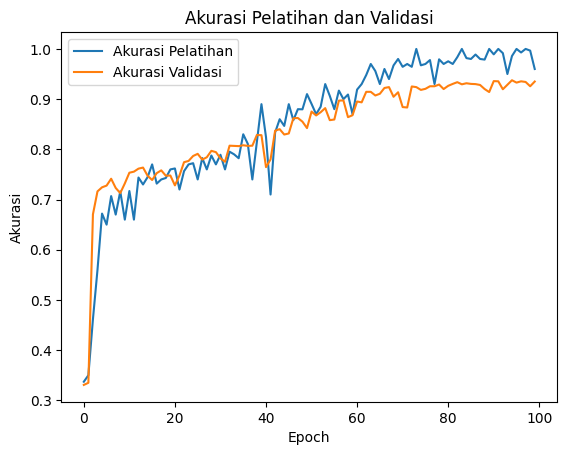

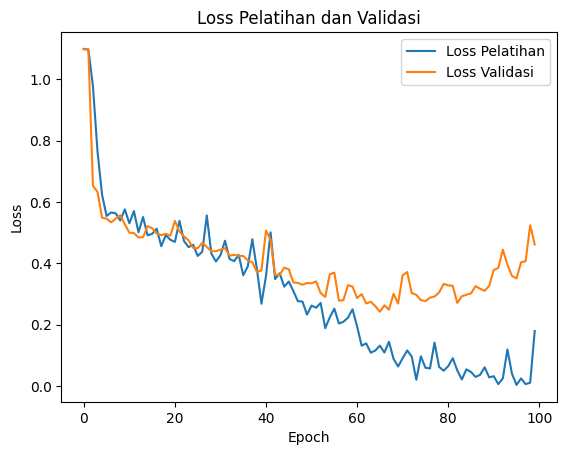

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step


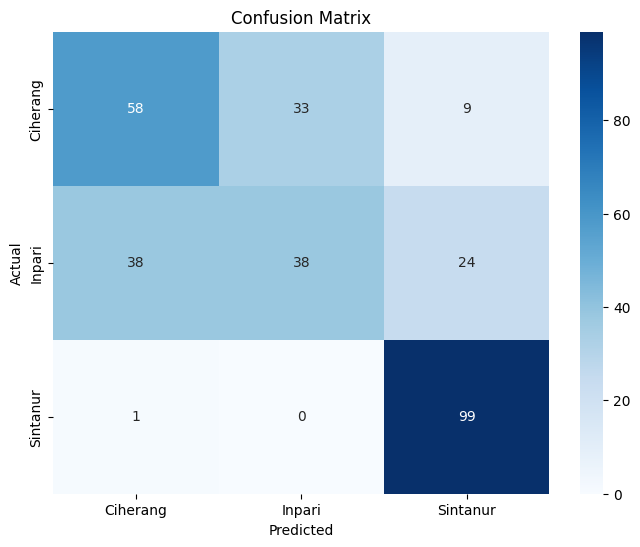


Classification Report:
              precision    recall  f1-score   support

    Ciherang       0.60      0.58      0.59       100
      Inpari       0.54      0.38      0.44       100
    Sintanur       0.75      0.99      0.85       100

    accuracy                           0.65       300
   macro avg       0.63      0.65      0.63       300
weighted avg       0.63      0.65      0.63       300



In [ ]:
# --- Tambahkan Confusion Matrix ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi data validasi
y_pred_probs = vgg16_model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label sebenarnya
y_true = test_data.classes

# Nama kelas
class_labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))



In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
